# 배운 것

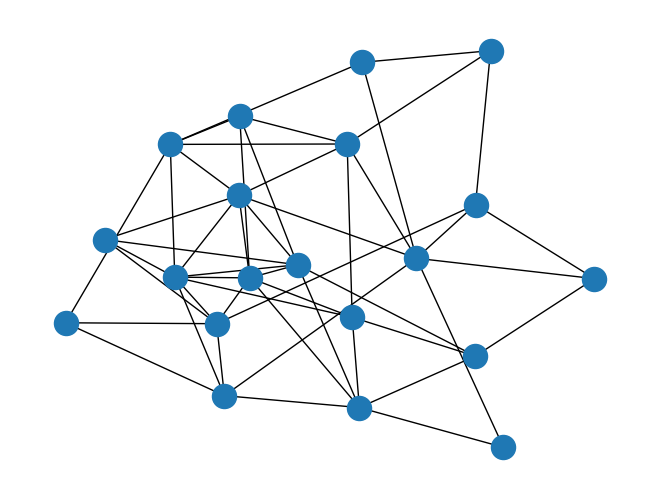

In [ ]:
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [ ]:
import random
import string

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state

In [ ]:
initial_state(G)

{0: 'B',
 1: 'D',
 2: 'B',
 3: 'D',
 4: 'B',
 5: 'C',
 6: 'A',
 7: 'D',
 8: 'D',
 9: 'C',
 10: 'A',
 11: 'C',
 12: 'B',
 13: 'A',
 14: 'B',
 15: 'B',
 16: 'D',
 17: 'C',
 18: 'C',
 19: 'C'}

In [ ]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [ ]:
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'B',
 1: 'D',
 2: 'C',
 3: 'A',
 4: 'A',
 5: 'D',
 6: 'B',
 7: 'A',
 8: 'D',
 9: 'B',
 10: 'C',
 11: 'B',
 12: 'D',
 13: 'D',
 14: 'C',
 15: 'B',
 16: 'C',
 17: 'B',
 18: 'D',
 19: 'A'}

In [ ]:
import matplotlib.pyplot as plt
from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Voter Model')

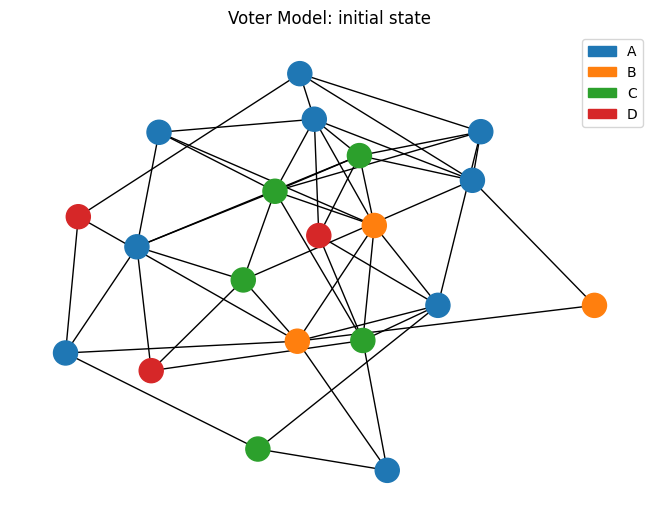

In [ ]:
sim.draw(labels='ABCD')

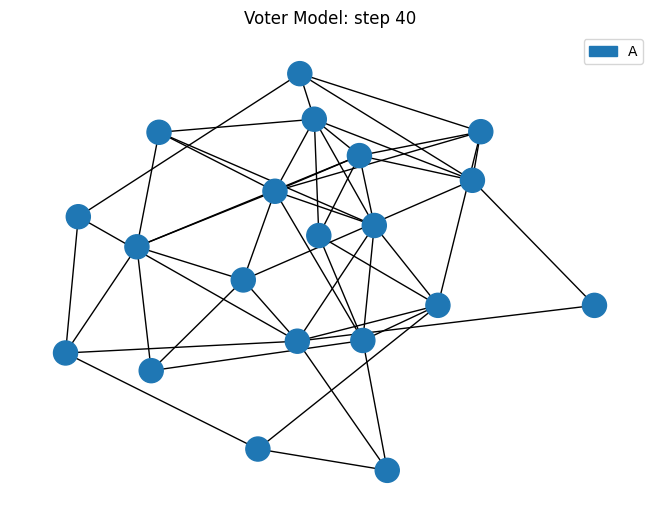

In [ ]:
sim.run(40)
sim.draw()

<Axes: title={'center': 'Voter Model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

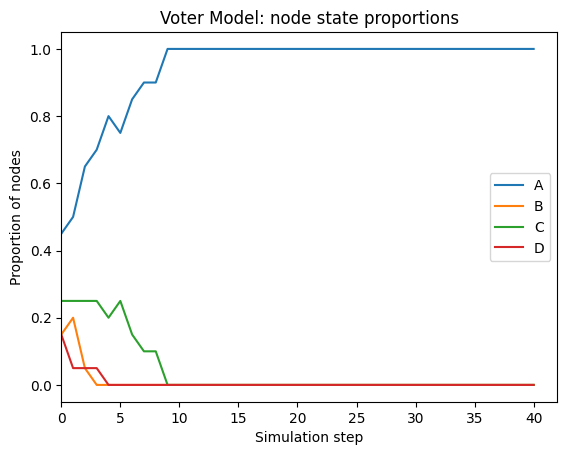

In [ ]:
sim.plot()

# 과제 첫번째 시도 실패

In [ ]:
import pandas as pd

# 다른 인코딩 방식으로 CSV 파일 읽기
covid_data = pd.read_csv("강원특별자치도_코로나19확진자 현황_20230822.csv", encoding='euc-kr')

# 데이터프레임의 처음 몇 줄을 출력하기
covid_data.head()

,날짜(0시기준),춘천,원주,강릉,동해,태백,속초,삼척,홍천,횡성,영월,평창,정선,철원,화천,양구,인제,고성,양양
0,2020-02-23,2,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-02-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-02-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 데이터 타입 변환
covid_data['날짜(0시기준)'] = pd.to_datetime(covid_data['날짜(0시기준)'])

# 결측치 확인
print(covid_data.isnull().sum())

# 전처리된 데이터 확인
covid_data.head()

날짜(0시기준)    0
춘천          0
원주          0
강릉          0
동해          0
태백          0
속초          0
삼척          0
홍천          0
횡성          0
영월          0
평창          0
정선          0
철원          0
화천          0
양구          0
인제          0
고성          0
양양          0
dtype: int64


,날짜(0시기준),춘천,원주,강릉,동해,태백,속초,삼척,홍천,횡성,영월,평창,정선,철원,화천,양구,인제,고성,양양
0,2020-02-23,2,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-02-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-02-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


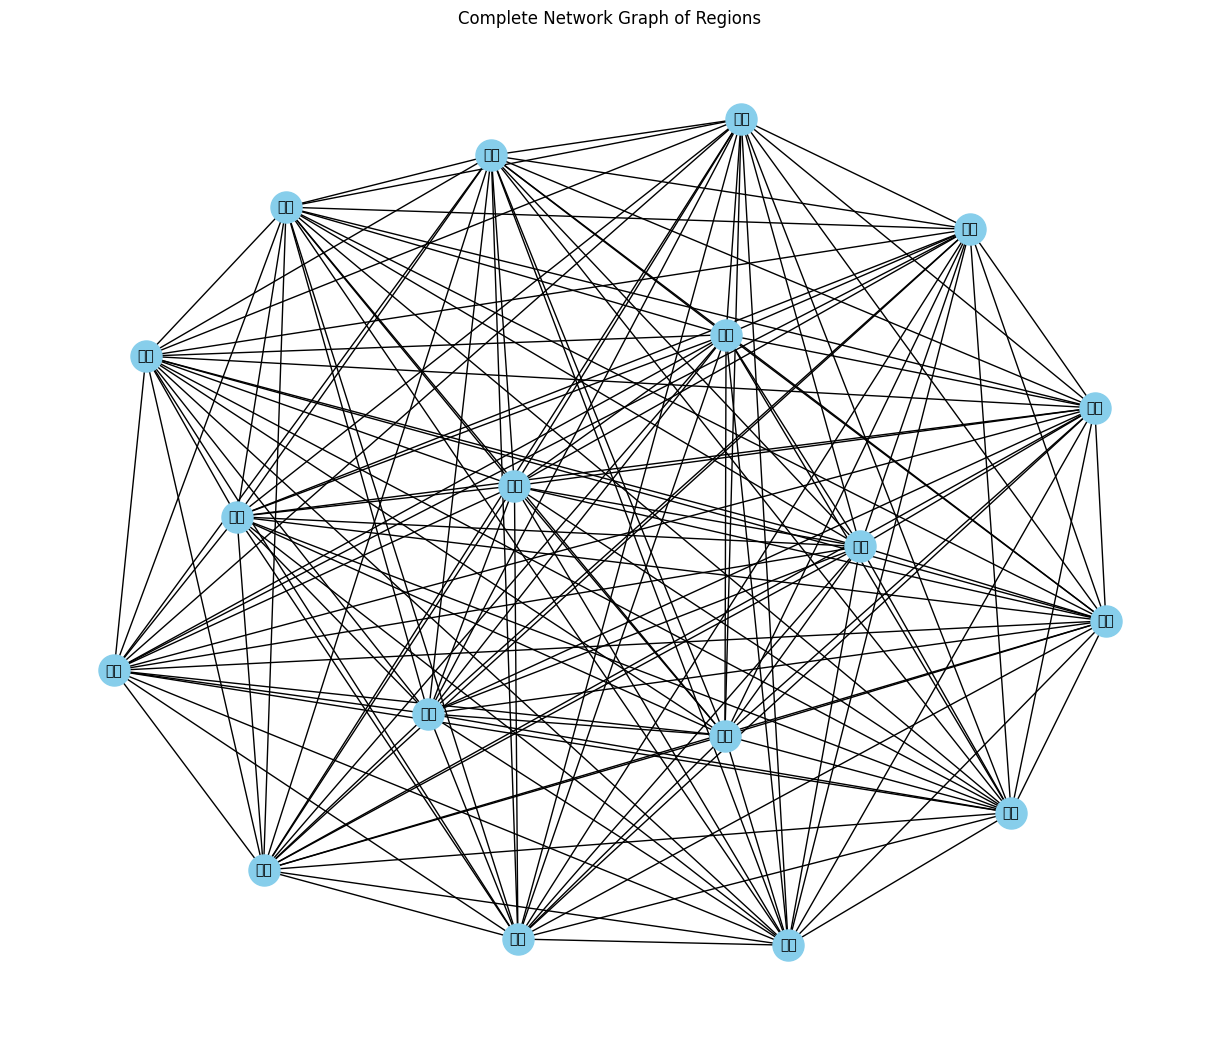

In [ ]:
# 각 노드는 강원도의 특정 지역을 나타내고, 모든 지역 간 엣지를 연결
G_covid_complete = nx.Graph()

# 노드 추가 (지역명)
for city in cities:
    G_covid_complete.add_node(city)

# 모든 노드(지역) 간 엣지 추가
for i, city1 in enumerate(cities):
    for city2 in cities[i+1:]:
        G_covid_complete.add_edge(city1, city2)

# 그래프 시각화
pos = nx.spring_layout(G_covid_complete)
plt.figure(figsize=(12, 10))
nx.draw(G_covid_complete, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Complete Network Graph of Regions')
plt.show()


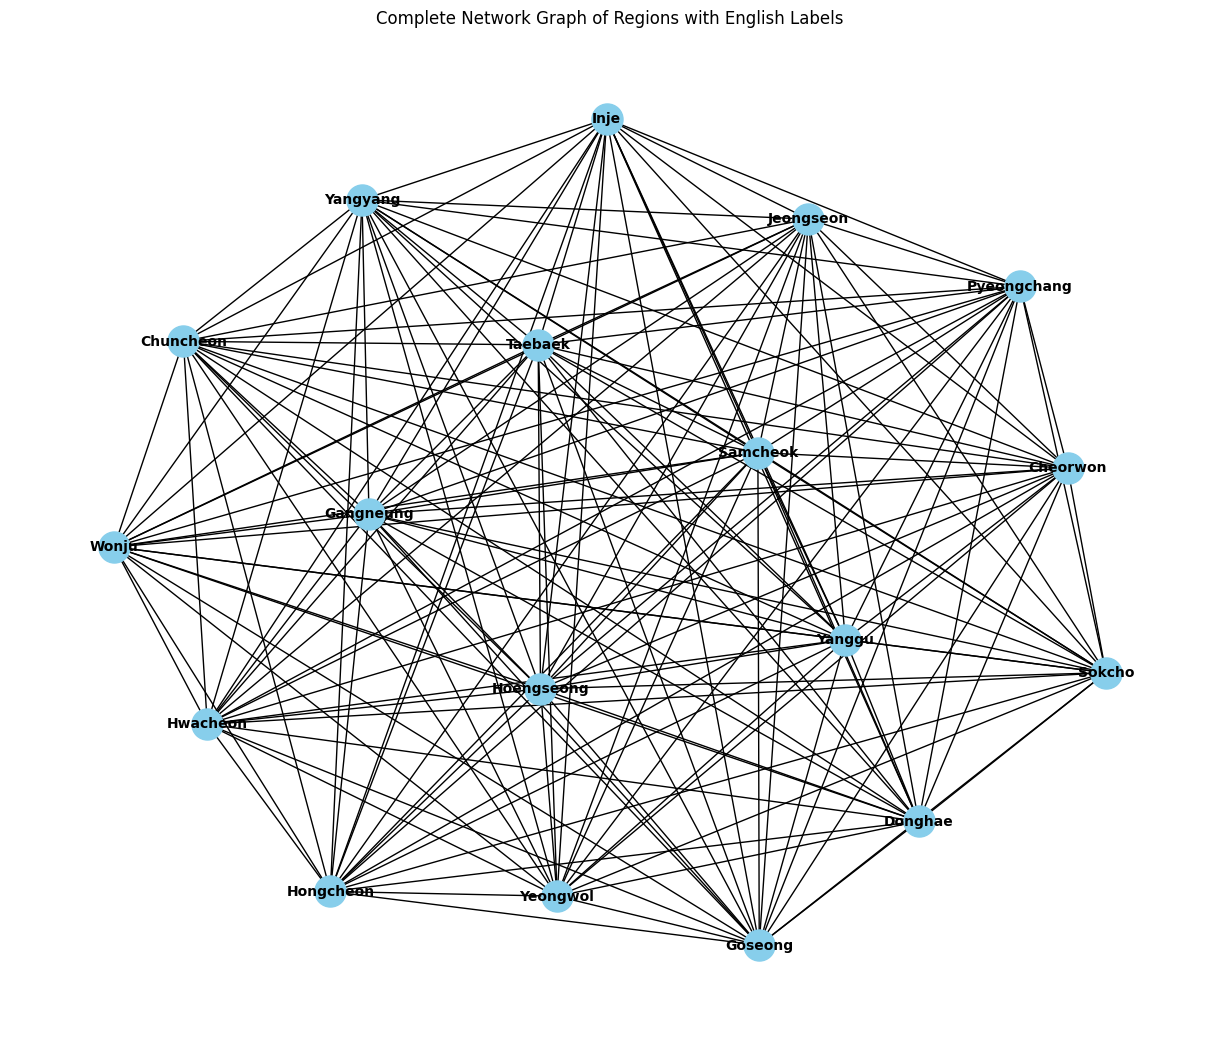

In [ ]:
# 강원도의 각 지역을 영어로 매핑
city_names = {
    '춘천': 'Chuncheon',
    '원주': 'Wonju',
    '강릉': 'Gangneung',
    '동해': 'Donghae',
    '태백': 'Taebaek',
    '속초': 'Sokcho',
    '삼척': 'Samcheok',
    '홍천': 'Hongcheon',
    '횡성': 'Hoengseong',
    '영월': 'Yeongwol',
    '평창': 'Pyeongchang',
    '정선': 'Jeongseon',
    '철원': 'Cheorwon',
    '화천': 'Hwacheon',
    '양구': 'Yanggu',
    '인제': 'Inje',
    '고성': 'Goseong',
    '양양': 'Yangyang'
}

# 각 노드에 영어 이름을 라벨로 추가하여 시각화
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_covid_complete)
nx.draw(G_covid_complete, pos, with_labels=True, labels=city_names, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Complete Network Graph of Regions with English Labels')
plt.show()

# 과제 두번째 시도

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from networkx.algorithms import community

# 데이터 로드
data = pd.read_csv('한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv', encoding='ISO-8859-1')
data.head()

<ipython-input-4-664dc13786c3>:8: DtypeWarning: Columns (153) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv', encoding='ISO-8859-1')


,id,knowcode,knowcode2019,keco07_4digit,keco18_4digit,job,sq1,sq2,sq3,sq4,...,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3
0,1901110201,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,5,5,3,...,5.0,ÇàÁ¤ÇÐ,1.0,3,,1,40,9000,9000,
1,1901110202,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,5,5,5,...,4.0,ÇàÁ¤ÇÐ,1.0,3,,1,40,7000,7000,
2,1901110203,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,4,5,5,...,4.0,Ã¶ÇÐ°ú,1.0,3,,1,44,11000,8000,
3,1901110204,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,4,4,5,...,5.0,»çÈ¸º¹ÁöÇÐ,1.0,1,,1,40,9000,7000,
4,1901110205,11102,11102,111,111,ÇàÁ¤ºÎ°íÀ§°ø¹«¿ø,5,5,4,3,...,4.0,Àç¾àÇÐ,1.0,1,,1,45,9300,7500,


In [6]:
import pandas as pd

# ISO-8859-1 인코딩으로 파일 읽기
data = pd.read_csv('한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv', encoding='ISO-8859-1', low_memory=False)

# 데이터프레임의 모든 문자열 열을 utf-8로 다시 인코딩
def decode_column(column):
    def safe_decode(x):
        if isinstance(x, str):
            try:
                return x.encode('ISO-8859-1').decode('euc-kr')
            except UnicodeDecodeError:
                return x
        return x
    return column.apply(safe_decode)

for column in data.select_dtypes(include=['object']):
    data[column] = decode_column(data[column])
# import ace_tools as tools; tools.display_dataframe_to_user(name="Decoded Data", dataframe=data)
data.head()


,id,knowcode,knowcode2019,keco07_4digit,keco18_4digit,job,sq1,sq2,sq3,sq4,...,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3
0,1901110201,11102,11102,111,111,행정부고위공무원,5,5,5,3,...,5,행정학,1,3,,1,40,9000,9000,
1,1901110202,11102,11102,111,111,행정부고위공무원,5,5,5,5,...,4,행정학,1,3,,1,40,7000,7000,
2,1901110203,11102,11102,111,111,행정부고위공무원,5,4,5,5,...,4,철학과,1,3,,1,44,11000,8000,
3,1901110204,11102,11102,111,111,행정부고위공무원,5,4,4,5,...,5,사회복지학,1,1,,1,40,9000,7000,
4,1901110205,11102,11102,111,111,행정부고위공무원,5,5,4,3,...,4,재약학,1,1,,1,45,9300,7500,


In [12]:
# 필요한 컬럼 선택 (예: 직업명과 관련된 지식)
columns_of_interest = ['job'] + [f'kq{i}_1' for i in range(1, 34)]  # kq1_1 ~ kq33_1 컬럼
print(columns_of_interest)
# columns_of_interest
data_subset = data[columns_of_interest]
data_subset

['job', 'kq1_1', 'kq2_1', 'kq3_1', 'kq4_1', 'kq5_1', 'kq6_1', 'kq7_1', 'kq8_1', 'kq9_1', 'kq10_1', 'kq11_1', 'kq12_1', 'kq13_1', 'kq14_1', 'kq15_1', 'kq16_1', 'kq17_1', 'kq18_1', 'kq19_1', 'kq20_1', 'kq21_1', 'kq22_1', 'kq23_1', 'kq24_1', 'kq25_1', 'kq26_1', 'kq27_1', 'kq28_1', 'kq29_1', 'kq30_1', 'kq31_1', 'kq32_1', 'kq33_1']


,job,kq1_1,kq2_1,kq3_1,kq4_1,kq5_1,kq6_1,kq7_1,kq8_1,kq9_1,...,kq24_1,kq25_1,kq26_1,kq27_1,kq28_1,kq29_1,kq30_1,kq31_1,kq32_1,kq33_1
0,행정부고위공무원,1,2,1,1,4,1,1,1,3,...,3,3,1,1,1,1,3,1,5,1
1,행정부고위공무원,4,4,2,3,4,4,1,1,3,...,4,2,1,1,1,1,1,4,1,1
2,행정부고위공무원,5,3,5,4,5,5,4,1,3,...,3,3,1,3,5,5,5,1,4,1
3,행정부고위공무원,4,4,4,1,5,4,1,1,4,...,2,3,1,1,4,2,2,1,3,1
4,행정부고위공무원,5,3,3,1,5,4,1,1,4,...,1,2,1,2,3,3,4,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17138,어부 및 해녀,1,1,1,1,1,1,1,3,1,...,1,1,1,1,1,1,1,1,1,1
17139,어부 및 해녀,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17140,어부 및 해녀,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17141,어부 및 해녀,1,1,1,3,4,1,1,1,1,...,1,1,1,1,1,1,1,4,1,3


In [13]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from sklearn.metrics.pairwise import cosine_similarity
# from networkx.algorithms import community

# # 데이터 로드
# file_path = '/mnt/data/한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv'
# data = pd.read_csv(file_path, encoding='latin1')

# # 필요한 컬럼 선택 (예: 직업명과 관련된 지식)
# columns_of_interest = ['job'] + [f'kq{i}_1' for i in range(1, 34)]  # kq1_1 ~ kq33_1 컬럼
# data_subset = data[columns_of_interest]

# 직업명을 인덱스로 설정
data_subset.set_index('job', inplace=True)
# 결측값 처리 (0으로 대체)
data_subset.fillna(0, inplace=True)

# 유사도 행렬 계산
similarity_matrix = cosine_similarity(data_subset)
similarity_df = pd.DataFrame(similarity_matrix, index=data_subset.index, columns=data_subset.index)

# 네트워크 생성
G = nx.Graph()

# 노드 추가
for job in data_subset.index:
    G.add_node(job)

# 링크 추가 (유사도가 특정 임계값 이상인 경우에만 링크 생성)
threshold = 0.7  # 임계값은 조정 가능
for i, job1 in enumerate(data_subset.index):
    for j, job2 in enumerate(data_subset.index):
        if i < j and similarity_df.loc[job1, job2] > threshold:
            G.add_edge(job1, job2, weight=similarity_df.loc[job1, job2])

# 군집 분석 (Girvan-Newman 알고리즘 사용)
communities = community.girvan_newman(G)
top_level_communities = next(communities)
sorted_communities = sorted(map(sorted, top_level_communities))

# 네트워크 시각화
pos = nx.spring_layout(G)  # 레이아웃 설정
plt.figure(figsize=(12, 12))

# 노드 그리기 (군집별로 색상 다르게)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i, community in enumerate(sorted_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}')

# 엣지 그리기
nx.draw_networkx_edges(G, pos, alpha=0.5)

# 라벨 그리기
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('직업 네트워크 시각화 및 군집 분석')
plt.legend()
plt.show()

<ipython-input-13-dfdddac15603>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.fillna(0, inplace=True)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from networkx.algorithms import community

# # 데이터 로드
# file_path = '/mnt/data/한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv'
# data = pd.read_csv(file_path, encoding='latin1')

# # 필요한 컬럼 선택 (예: 직업명과 관련된 지식)
# columns_of_interest = ['job', 'kq1_1', 'kq1_2', 'kq2_1', 'kq2_2']  # 예시 컬럼
# data_subset = data[columns_of_interest]

# # 직업 간의 관계 정의 (예: 지식이 유사한 직업들 간에 링크 생성)
# # 간단한 유사도 계산을 위해 코사인 유사도를 사용할 수 있음
# from sklearn.metrics.pairwise import cosine_similarity

# # 직업명을 인덱스로 설정
# data_subset.set_index('job', inplace=True)
# # 결측값 처리 (0으로 대체)
# data_subset.fillna(0, inplace=True)

# # 유사도 행렬 계산
# similarity_matrix = cosine_similarity(data_subset)
# similarity_df = pd.DataFrame(similarity_matrix, index=data_subset.index, columns=data_subset.index)

# # 네트워크 생성
# G = nx.Graph()

# # 노드 추가
# for job in data_subset.index:
#     G.add_node(job)

# # 링크 추가 (유사도가 특정 임계값 이상인 경우에만 링크 생성)
# threshold = 0.7  # 임계값은 조정 가능
# for i, job1 in enumerate(data_subset.index):
#     for j, job2 in enumerate(data_subset.index):
#         if i < j and similarity_df.loc[job1, job2] > threshold:
#             G.add_edge(job1, job2, weight=similarity_df.loc[job1, job2])

# # 군집 분석 (Girvan-Newman 알고리즘 사용)
# communities = community.girvan_newman(G)
# top_level_communities = next(communities)
# sorted_communities = sorted(map(sorted, top_level_communities))

# # 네트워크 시각화
# pos = nx.spring_layout(G)  # 레이아웃 설정
# plt.figure(figsize=(12, 12))

# # 노드 그리기 (군집별로 색상 다르게)
# colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
# for i, community in enumerate(sorted_communities):
#     nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}')

# # 엣지 그리기
# nx.draw_networkx_edges(G, pos, alpha=0.5)

# # 라벨 그리기
# nx.draw_networkx_labels(G, pos, font_size=10)

# plt.title('직업 네트워크 시각화 및 군집 분석')
# plt.legend()
# plt.show()